In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(992L, 1880L, 3L)
(100L, 189L, 3L)
<type 'numpy.ndarray'>
(18900L, 3L)


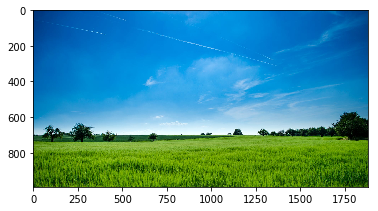

In [120]:
im =cv2.imread('D:/ML--perceptron/data/im1.jpeg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB) #Swapping colors for matplotlib
plt.imshow(im)
print im.shape

r, c = im.shape[:2] # general python overloaded operation..

out_r=100
im = cv2.resize(im,(int(out_r*float(c)/r),out_r)) # can reshape width,height..
print im.shape
print type(im)

pixels=im.reshape((-1,3))
print pixels.shape

In [121]:
res=np.array((4,3,2))
res1=res.reshape((-1,1))
#res2=res.reshape((-1,4))
#res3=res.reshape((2,-1))
print res1.shape
#print res2.shape
#print res3.shape

(3L, 1L)


In [122]:
km=KMeans(n_clusters=8)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[ 60 164 224]
8
0
1
2
3
4
5
6
7


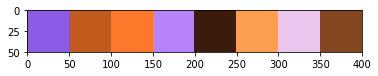

In [123]:
#Trying experiments:
centr_colors=np.array(km.cluster_centers_,dtype='uint8')
print centr_colors[1]
patch=np.ones((50,400,3))
print centr_colors.shape[0]
for ix in range(centr_colors.shape[0]):
    print ix
    patch[:,ix*50:(ix+1)*50,:]=centr_colors[ix].reshape((1,1,3))-255

plt.imshow(patch)

[ 60 164 224]
8
0
1
2
3
4
5
6
7


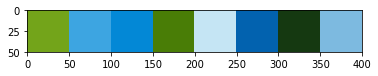

In [124]:
#Trying experiments:
centr_colors=np.array(km.cluster_centers_,dtype='uint8')
print centr_colors[1]
patch=np.ones((50,400,3))
print centr_colors.shape[0]
for ix in range(centr_colors.shape[0]):
    print ix
    patch[:,ix*50:(ix+1)*50,:]=255-centr_colors[ix].reshape((1,1,3))

plt.imshow(patch)

[ 60.39813243 164.19397284 224.3106961 ]
8
0
1
2
3
4
5
6
7


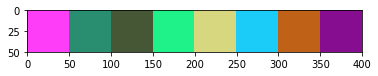

In [125]:
#Trying experiments:
centr_colors=np.array(km.cluster_centers_)
print centr_colors[1]
patch=np.ones((50,400,3))
print centr_colors.shape[0]
for ix in range(centr_colors.shape[0]):
    print ix
    patch[:,ix*50:(ix+1)*50,:]=centr_colors[ix].reshape((1,1,3))

plt.imshow(patch)

In [126]:
centr_colors=np.array(km.cluster_centers_,dtype='uint8')
print centr_colors.dtype
print centr_colors
print centr_colors.shape

uint8
[[114 163  25]
 [ 60 164 224]
 [  2 135 213]
 [ 72 124   5]
 [196 228 243]
 [  1  97 174]
 [ 20  56  16]
 [124 185 223]]
(8L, 3L)


In [127]:
freq=np.array(np.unique(km.labels_,return_counts=True)[1],dtype=float)
print freq
freq=freq/pixels.shape[0]
print freq

[2349. 2356. 5216. 2356.  907. 3031. 1238. 1447.]
[0.12428571 0.12465608 0.27597884 0.12465608 0.04798942 0.16037037
 0.06550265 0.07656085]


In [128]:
dom=[[freq[ix],centr_colors[ix]] for ix in range(km.n_clusters)]

DOM=sorted(dom, key=lambda z:z[0], reverse=True)
print DOM

[[0.275978835978836, array([  2, 135, 213], dtype=uint8)], [0.16037037037037036, array([  1,  97, 174], dtype=uint8)], [0.12465608465608466, array([ 60, 164, 224], dtype=uint8)], [0.12465608465608466, array([ 72, 124,   5], dtype=uint8)], [0.12428571428571429, array([114, 163,  25], dtype=uint8)], [0.07656084656084657, array([124, 185, 223], dtype=uint8)], [0.0655026455026455, array([20, 56, 16], dtype=uint8)], [0.04798941798941799, array([196, 228, 243], dtype=uint8)]]


In [129]:
for ix in DOM:
    print ix
    print "-----"

[0.275978835978836, array([  2, 135, 213], dtype=uint8)]
-----
[0.16037037037037036, array([  1,  97, 174], dtype=uint8)]
-----
[0.12465608465608466, array([ 60, 164, 224], dtype=uint8)]
-----
[0.12465608465608466, array([ 72, 124,   5], dtype=uint8)]
-----
[0.12428571428571429, array([114, 163,  25], dtype=uint8)]
-----
[0.07656084656084657, array([124, 185, 223], dtype=uint8)]
-----
[0.0655026455026455, array([20, 56, 16], dtype=uint8)]
-----
[0.04798941798941799, array([196, 228, 243], dtype=uint8)]
-----


Final Result :

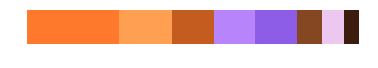

In [133]:
patch=np.ones((50,500,3))
start=0
for ix in range(km.n_clusters):
    width=int(DOM[ix][0]*patch.shape[1])
    end=start+width
    patch[:,start:end,:]=DOM[ix][1]
    start=end
    plt.axis("off")
    plt.imshow(patch)
plt.show()